<a href="https://colab.research.google.com/github/tdm09/assignment01-carloselucio/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic
## Descripcion
Reto de Titanic

## Coneccion Google Dirve & Redirecionamiento de Directorio

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Titanic" 
!ls

/content/gdrive/MyDrive/ColabNotebooks/ConcentraciónIA
 DatasetLoadingTemplate.ipynb   Ses02_RegresiónLineal
 iris.data		        Ses03_Practice.ipynb
'Módulo Machine Learning'       train_titanic.csv
 PlayDataset.csv	        Untitled
 Práctica1_Numpy.ipynb	        Untitled0.ipynb
 Práctica1_Pandas.ipynb         Valhalla23.csv
 Práctica2_Scikit-Learn.ipynb   wine.data
 Práctica2_SciPy.ipynb


## Librerias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Visualización de datos

### Data Shape
*   Rows: 891
*   Columns: 12



In [ ]:
# Load data
titanic = pd.read_csv('train.csv')

# Size of dataset
titanic.shape

(891, 12)

In [ ]:
# Initial data visualization
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Relevant statistics
*   Age column is missing 177 data points



In [ ]:
# Show relevant statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Show deaths and survivors
titanic['Survived'].value_counts()

# Deaths = 549
# Surivvors = 342


0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


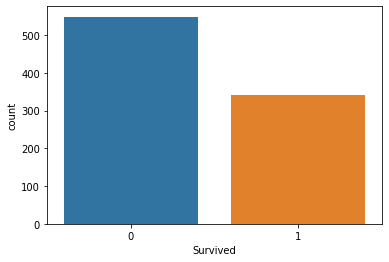

In [ ]:
# Visualize count of survivors
sns.countplot(titanic['Survived'])

In [ ]:
from zmq.constants import NULL
# Create a new column 'Who' to classify by man, woman or child
def conditions(age, sex):
    if np.isnan(age) : return
    elif (age >= 18) and (sex == 'male') : return "man"
    elif (age >= 18) and (sex == 'female') : return "woman"
    else : return "child"

func = np.vectorize(conditions)
who_class = func(titanic["Age"], titanic["Sex"])

titanic["Who"] = who_class


titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [ ]:
# Cambiar variables para usarlas
titanic.Sex = titanic.Sex.astype('category').cat.codes
# titanic.Embarked = titanic.Embarked.astype('category').cat.codes
# titanic.Age.fillna(int(titanic.Age.mean()), inplace=True)
# titanic.Embarked.fillna(int(titanic.Embarked.mean()), inplace=True)

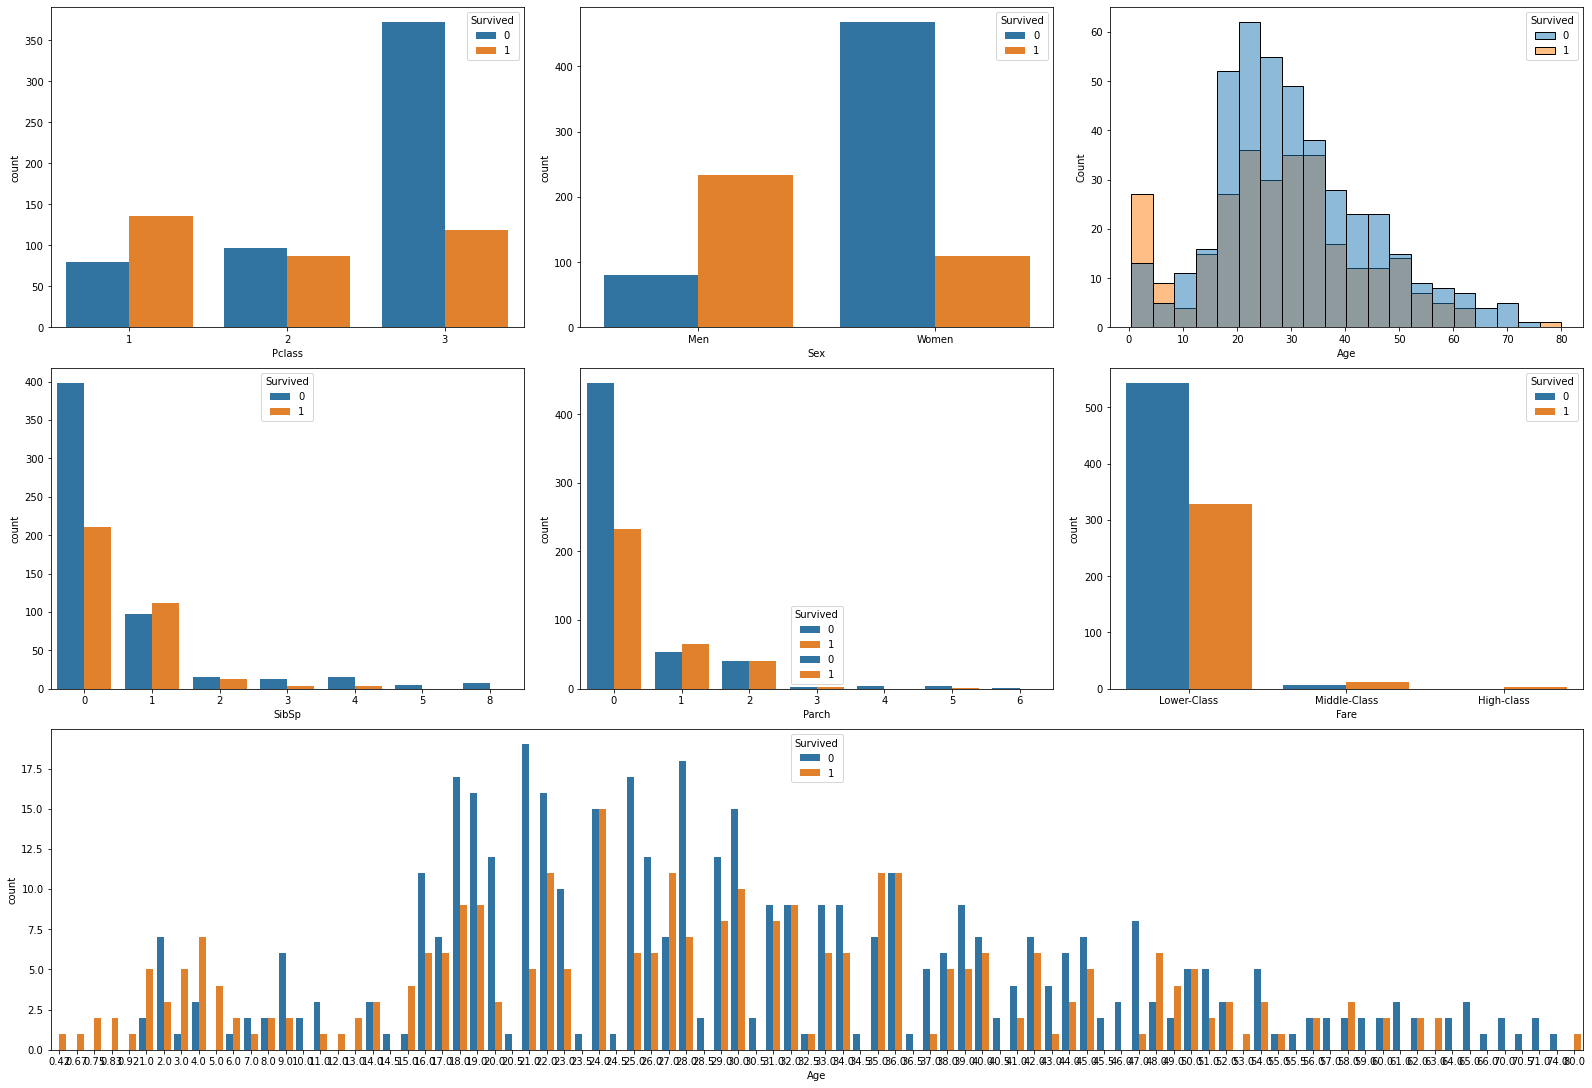

In [ ]:
# Generacion de grid para visualizacion de graficos
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
fig = plt.figure(constrained_layout=True, figsize=(22,15))
gs = GridSpec(6, 3, figure=fig)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[0:2, 2])
ax4 = fig.add_subplot(gs[2:4, 0])
ax5 = fig.add_subplot(gs[2:4, 1])
ax6 = fig.add_subplot(gs[2:4, 2])
ax7 = fig.add_subplot(gs[4:6, 0:3])


# Generacion de diferentes graficas de visualizacion

sns.countplot(ax=ax1, x='Pclass', hue='Survived', data=titanic)

titles = ['Men', 'Women']
sns.countplot(ax=ax2, x=pd.cut(titanic.Sex, 2, labels=titles), hue='Survived', data=titanic)

sns.histplot(ax=ax3 ,x='Age', hue='Survived', data=titanic)
sns.countplot(ax=ax4, x='SibSp', hue='Survived', data=titanic)
sns.countplot(ax=ax5, x='Parch', hue='Survived', data=titanic)

titles = ['Lower-Class', 'Middle-Class', 'High-class']
sns.countplot(ax=ax6, x=pd.cut(titanic.Fare, 3, labels=titles), hue='Survived', data=titanic)

sns.countplot(ax=ax5, x='Parch', hue='Survived', data=titanic)
sns.countplot(ax=ax7 ,x='Age', hue='Survived', data=titanic)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

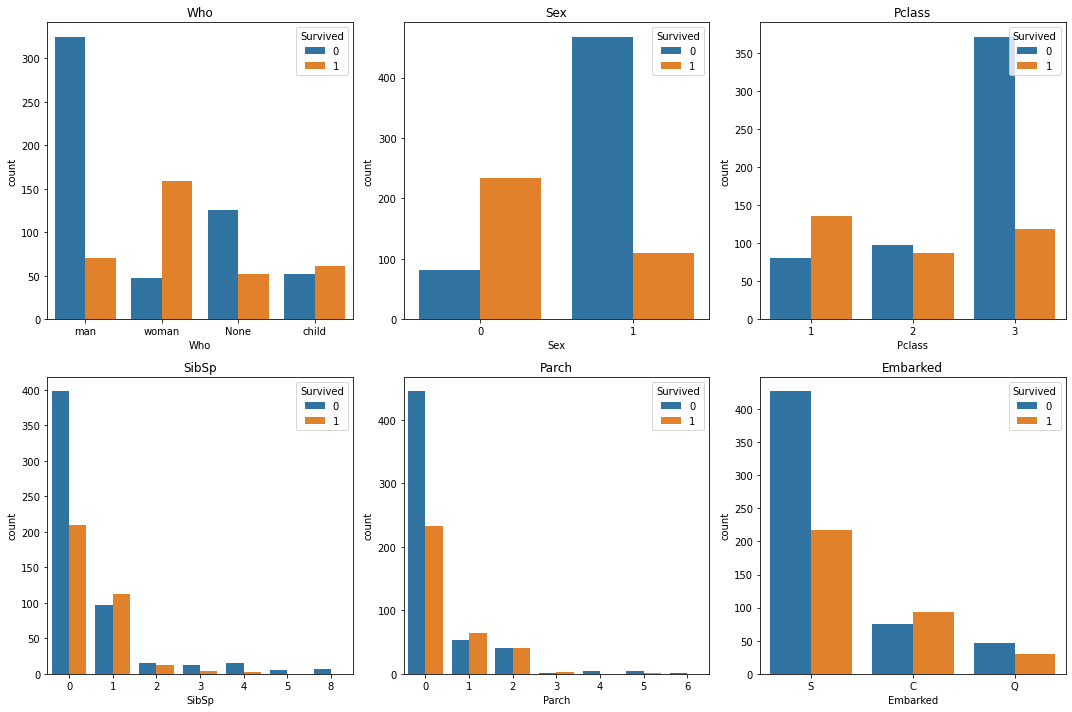

In [ ]:
# Visualize count of survivors for multiple columns
cols_arr = ['Who','Sex', 'Pclass', 'SibSp',  'Parch', 'Embarked']
rows = 2
cols = 3

# Subplots and get size of each plot
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))


for r in range(0, rows) : 
  for c in range(0, cols) : 
    i = r * cols + c # Index to go through number of columns
    ax = axs[r][c] # Position each subplot
    sns.countplot(titanic[cols_arr[i]], hue=titanic['Survived'], ax = ax)
    ax.set_title(cols_arr[i])
    ax.legend(title='Survived', loc = 'upper right')

plt.tight_layout()

In [ ]:
# Survival rate by sex and age
titanic.groupby('Who')[['Survived']].mean()

# 53.98% of Childs survived
# 17.72% of Men survived
# 77.18% of Women survived

,Survived
Who,
None,0.293785
child,0.539823
man,0.177215
woman,0.771845


In [ ]:
# Survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

# 74.2% of Females survived
# 18.89% of Males survived


,Survived
Sex,
0,0.742038
1,0.188908


In [ ]:
# Survival rate by sex and class
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

# Assuming people where in their cabins when ship sunk...
# 96.8% of Females in First Class Survived
# 92.1% of Females in Second Class Survived
# 50% of Females in Third Class Survived

# 36.88% of Males in First Class Survived
# 15.74% of Males in Second Class Survived
# 13.54% of Males in Third Class Survived


Pclass,1,2,3
Sex,,,
0,0.968085,0.921053,0.500000
1,0.368852,0.157407,0.135447


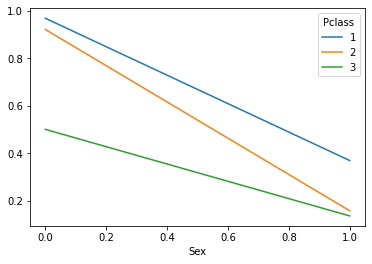

In [ ]:
# Survival rate by sex and class plot
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

In [ ]:
# Survival rate by class
# In general: 
#   62.96% of people in 1st class survived.
#   47.28% of people in 2nd class survived.
#   24.24% of people in 3rd class survived.
titanic.pivot_table('Survived', columns = 'Pclass')

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


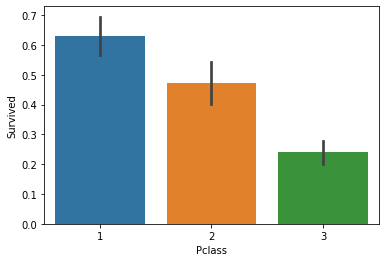

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic) 

In [ ]:
# View survival rate by Age, sex and class
age = pd.cut(titanic['Age'], [0,18,80]) # 80 is max age
titanic.pivot_table('Survived', index = ['Sex', age], columns = 'Pclass')

# In general...
#   Females (0,18): 
#     91% Survived in first class
#     100% Survived in second class
#     51% Survived in third class
#   Females (18,80): 
#     97% Survived in first class
#     90% Survived in second class
#     42% Survived in third class

#   Males (0,18): 
#     80% Survived in first class
#     60% Survived in second class
#     22% Survived in third class
#   Males (18,80): 
#     38% Survived in first class
#     7% Survived in second class
#     13% Survived in third class

Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 80]  0.972973  0.900000  0.423729
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 80]  0.375000  0.071429  0.133663

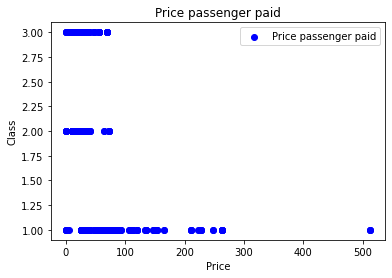

In [ ]:
# Display price paid per passenger by class
plt.scatter(titanic['Fare'], titanic['Pclass'], color='blue', label='Price passenger paid')
plt.ylabel('Class')
plt.xlabel('Price')
plt.title('Price passenger paid')
plt.legend()
plt.show()

# Data Cleaning

In [ ]:
# Count of null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Who              0
dtype: int64

In [ ]:
titanic = titanic.drop('Who', axis=1)
# Removing rows with missing values
titanic = titanic.dropna(subset = ['Embarked', 'Age'], axis=0)

titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
# Removing more unecessary cols
# We don't need the name or number of ticket for the prediction model, and Cabin has to many missing values.
titanic = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
# Switch object types to integers
# !pip install -U scikit-learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

# Male: 1
# Female: 0


# Embarked
# C: 0
# Q: 1
# S: 2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Predicting Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# X is our data, Y is the survived column (dependent variable)
X_train = titanic.iloc[:, 2:9].values
Y_train = titanic.iloc[:, 1].values

In [ ]:
# Scale the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
# Models creation for survived prediction
def predictingModels(X_train, Y_train):

  # Instance of the Regression Logistic model
  log_model = LogisticRegression(random_state = 0)
  log_model.fit(X_train, Y_train)

  # Instance of the KNeighbords model
  KN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  KN_model.fit(X_train, Y_train)

  # Instance of Support Vector Classifier model (linear kernel)
  SVC_linear = SVC(kernel = 'linear', random_state = 0)
  SVC_linear.fit(X_train, Y_train)

  # Instance of Support Vector Classifier model (RBF kernel)
  SVC_rbf = SVC(kernel = 'rbf', random_state = 0)
  SVC_rbf.fit(X_train, Y_train)

  # Instance of GaussianNB model
  gauss_model = GaussianNB()
  gauss_model.fit(X_train, Y_train)

  # Instance of Desicion Tree
  tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree_model.fit(X_train, Y_train)

  # Instance of RandomForestClassifier
  forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest_model.fit(X_train, Y_train)

  # Accuracy of the models
  print('Logistic Regression Trainig Accuracy: ', log_model.score(X_train, Y_train))
  print('KNeighbords model Trainig Accuracy: ', KN_model.score(X_train, Y_train))
  print('SVC Linear Trainig Accuracy: ', SVC_linear.score(X_train, Y_train))
  print('SVC RBF  Trainig Accuracy: ', SVC_rbf.score(X_train, Y_train))
  print('Gaussian NB  Accuracy: ', gauss_model.score(X_train, Y_train))
  print('Desicion tree Accuracy: ', tree_model.score(X_train, Y_train))
  print('Random Forest Accuracy: ', forest_model.score(X_train, Y_train))

  return log_model, KN_model, SVC_linear, SVC_rbf, gauss_model, tree_model, forest_model

In [ ]:
# Training all the models
model = predictingModels(X_train, Y_train)

# Models accuracy based on the trainig data:

# Logistic Regression Trainig Accuracy: 80.19 %
# KNeighbords model Trainig Accuracy: 86.51 %
# SVC Linear Trainig Accuracy: 77.95 %
# SVC RBF Regression Trainig Accuracy: 84.41 %
# Gaussian NB Regression Trainig Accuracy: 79.494 %
# Desicion tree Regression Trainig Accuracy: 98.59 %
# Random Forest Regression Trainig Accuracy: 97.33 %

In [ ]:
# Confusion matrix for all the models tested
#from sklearn.metrics import confusion_matrix

In [ ]:
# Get feature importance from the prediction model with the most accuracy
forest_model = model[6]
importances = pd.DataFrame({'Feature': titanic.iloc[:, 2:9].columns, 'Importance': np.round(forest_model.feature_importances_, 3)})
importances = importances.sort_values('Importance', ascending = False).set_index('Feature')
importances

In [ ]:
# Visualization of the features importance
importances.plot.bar()

# Test

In [ ]:
df_test = pd.read_csv('test.csv')

## Data Cleaning

In [ ]:
# Count of null values
df_test.isna().sum()

In [ ]:
# Removing rows with missing values
# df_test = df_test.dropna(subset = ['Cabin', 'Age'], axis=0)
df_test.describe()

In [ ]:
# Removing the unecessary cols
# We drop the same columns that we droped in the training data for the same reasons as before.
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Switch object types to integers
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])
df_test.head()

# Male: 1
# Female: 0

# Embarked
# C: 0
# Q: 1
# S: 2

In [ ]:
# Fill the null values with the mean of their respective data to make prediction possible
df_test.Age.fillna(int(df_test.Age.mean()), inplace=True)
df_test.Fare.fillna(int(df_test.Fare.mean()), inplace=True)

In [ ]:
df_test.isna().sum()

## Prediction

In [ ]:
# Collect the independet variables
X_test = df_test.iloc[:, 1:8].values

In [ ]:
# Scale the data 
X_test = sc.fit_transform(X_test)

In [ ]:
# Prediction
Y_test = model[6].predict(X_test)

# Create the output
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': Y_test})
output.to_csv('submission.csv', index=False)